In [9]:
import pandas as pd

data_path = "../data_sets/mimic-iii-data/"

df_patients = pd.read_csv(data_path + 'PATIENTS.csv.gz', low_memory=False)
df_admissions = pd.read_csv(data_path + 'ADMISSIONS.csv.gz', low_memory=False)
df_icustays = pd.read_csv(data_path + 'ICUSTAYS.csv.gz', low_memory=False)
# df_diagnoses_icd = pd.read_csv(data_path + 'DIAGNOSES_ICD.csv', low_memory=False)
# df_d_icd_diagnoses = pd.read_csv(data_path + 'D_ICD_DIAGNOSES.csv', low_memory=False)
# df_d_items = pd.read_csv(data_path + 'D_ITEMS.csv', low_memory=False)

df_patients.head()


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


### Dictionary for PATIENTS
- **SUBJECT_ID** is a unique identifier which specifies an individual patient. SUBJECT_ID is a candidate key for the table, so is unique for each row. Information that is consistent for the lifetime of a patient is stored in this table.   
- **GENDER** is the genotypical sex of the patient.   
- **DOB** is the date of birth of the given patient. Patients who are older than 89 years old at any time in the database have had their date of birth shifted to obscure their age and comply with HIPAA. The shift process was as follows: the patient’s age at their first admission was determined. The date of birth was then set to exactly 300 years before their first admission.  
- **DOD** is the date of death for the given patient. **DOD_HOSP** is the date of death as recorded in the hospital database. **DOD_SSN** is the date of death from the social security database. Note that DOD merged together DOD_HOSP and DOD_SSN, giving priority to DOD_HOSP if both were recorded.  
- **EXPIRE_FLAG** is a binary flag which indicates whether the patient died, i.e. whether DOD is null or not. These deaths include both deaths within the hospital (DOD_HOSP) and deaths identified by matching the patient to the social security master death index (DOD_SSN).  

In [6]:
df_patients.shape

(46520, 8)

In [3]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       46520 non-null  int64 
 1   SUBJECT_ID   46520 non-null  int64 
 2   GENDER       46520 non-null  object
 3   DOB          46520 non-null  object
 4   DOD          15759 non-null  object
 5   DOD_HOSP     9974 non-null   object
 6   DOD_SSN      13378 non-null  object
 7   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [4]:
df_patients.describe()

,ROW_ID,SUBJECT_ID,EXPIRE_FLAG
count,46520.000000,46520.000000,46520.000000
mean,23260.500000,34425.772872,0.338758
std,13429.311598,28330.400343,0.473292
min,1.000000,2.000000,0.000000
25%,11630.750000,12286.750000,0.000000
50%,23260.500000,24650.500000,0.000000
75%,34890.250000,55477.500000,1.000000
max,46520.000000,99999.000000,1.000000


In [5]:
df_patients.isnull().sum()

ROW_ID             0
SUBJECT_ID         0
GENDER             0
DOB                0
DOD            30761
DOD_HOSP       36546
DOD_SSN        33142
EXPIRE_FLAG        0
dtype: int64

In [11]:
df_core = pd.merge(df_patients, df_admissions, how='inner', on='SUBJECT_ID')

df_core = pd.merge(df_core, df_icustays, on='SUBJECT_ID', how='inner' )

df_core.head()

,ROW_ID_x,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID_y,HADM_ID_x,...,HADM_ID_y,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,...,116935,215044,carevue,TSICU,MICU,23,12,2149-12-18 20:06:02,2149-12-24 13:31:45,5.7262
1,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,...,149546,269035,metavision,MICU,MICU,50,50,2155-02-03 20:17:29,2155-02-05 18:34:02,1.9282
2,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,...,149546,263055,metavision,TSICU,TSICU,14,14,2155-02-07 18:51:16,2155-02-11 16:00:39,3.8815
3,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,...,158975,282599,metavision,MICU,MICU,52,52,2156-05-01 18:10:12,2156-05-03 18:43:45,2.0233
4,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,321,116935,...,158975,263882,metavision,MICU,MICU,52,52,2156-05-10 17:47:35,2156-05-11 19:16:03,1.0614


In [14]:
df_core.shape

(116426, 37)

In [12]:
df_core.isnull().sum()

ROW_ID_x                     0
SUBJECT_ID                   0
GENDER                       0
DOB                          0
DOD                      60330
DOD_HOSP                 75429
DOD_SSN                  68711
EXPIRE_FLAG                  0
ROW_ID_y                     0
HADM_ID_x                    0
ADMITTIME                    0
DISCHTIME                    0
DEATHTIME               107078
ADMISSION_TYPE               0
ADMISSION_LOCATION           0
DISCHARGE_LOCATION           0
INSURANCE                    0
LANGUAGE                 39787
RELIGION                   525
MARITAL_STATUS           10929
ETHNICITY                    0
EDREGTIME                41808
EDOUTTIME                41808
DIAGNOSIS                   55
HOSPITAL_EXPIRE_FLAG         0
HAS_CHARTEVENTS_DATA         0
ROW_ID                       0
HADM_ID_y                    0
ICUSTAY_ID                   0
DBSOURCE                     0
FIRST_CAREUNIT               0
LAST_CAREUNIT                0
FIRST_WA

In [17]:
df_core.describe().T

,count,mean,std,min,25%,50%,75%,max
ROW_ID_x,116426.0,21417.077766,13139.505455,1.0000,10494.0000,20303.0000,32088.7500,46520.0000
SUBJECT_ID,116426.0,30599.282686,26947.255289,2.0000,11098.0000,21514.0000,45036.5000,99999.0000
EXPIRE_FLAG,116426.0,0.481817,0.499671,0.0000,0.0000,0.0000,1.0000,1.0000
ROW_ID_y,116426.0,27528.479850,16743.644903,1.0000,13581.0000,26285.0000,41347.7500,58976.0000
HADM_ID_x,116426.0,149908.816828,28896.321558,100001.0000,124812.2500,150047.0000,174626.0000,199999.0000
HOSPITAL_EXPIRE_FLAG,116426.0,0.080291,0.271745,0.0000,0.0000,0.0000,0.0000,1.0000
HAS_CHARTEVENTS_DATA,116426.0,0.970282,0.169810,0.0000,1.0000,1.0000,1.0000,1.0000
ROW_ID,116426.0,28638.027683,17451.310871,1.0000,14124.0000,27298.0000,42992.7500,61532.0000
HADM_ID_y,116426.0,149941.134343,28901.019267,100001.0000,124886.2500,150047.0000,174738.7500,199999.0000
ICUSTAY_ID,116426.0,249521.636147,28880.933788,200001.0000,224403.0000,249258.0000,274420.7500,299999.0000


<Axes: xlabel='LOS', ylabel='Count'>

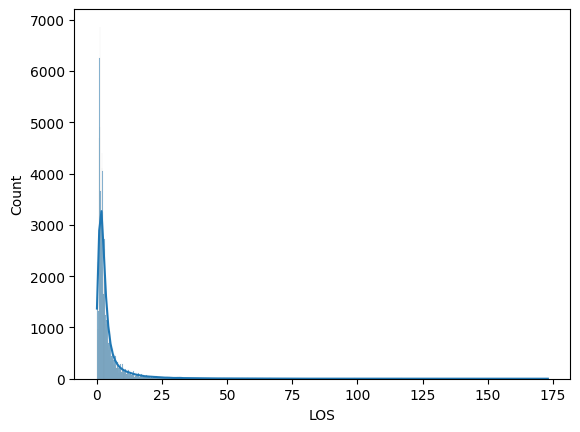

In [18]:
import seaborn as sns

sns.histplot(df_core['LOS'], kde=True)

In [19]:
categorical_cols = df_core.select_dtypes(include='object').columns.tolist()
categorical_cols

['GENDER',
 'DOB',
 'DOD',
 'DOD_HOSP',
 'DOD_SSN',
 'ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'EDREGTIME',
 'EDOUTTIME',
 'DIAGNOSIS',
 'DBSOURCE',
 'FIRST_CAREUNIT',
 'LAST_CAREUNIT',
 'INTIME',
 'OUTTIME']

ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values